In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

In [2]:
checkpoint = '/Users/cjw/Data/sez/sez_checkpoints/2019-01-28/unet_checkpoint-3000'
cpmeta = checkpoint + '.meta'

In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.import_meta_graph(cpmeta)
saver.restore(sess, checkpoint)

INFO:tensorflow:Restoring parameters from /Users/cjw/Data/sez/sez_checkpoints/2019-01-28/unet_checkpoint-3000


In [4]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    try:
        print(op.name, op.outputs, len(op.outputs))
    except:
        print(op.name, "no output")
    print('------')

init [] 0
------
Placeholder [<tf.Tensor 'Placeholder:0' shape=(?, 256, 256, 3) dtype=float32>] 1
------
Placeholder_1 [<tf.Tensor 'Placeholder_1:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
Placeholder_2 [<tf.Tensor 'Placeholder_2:0' shape=() dtype=float32>] 1
------
encoder-layer-12-0/kernel/Initializer/random_uniform/shape [<tf.Tensor 'encoder-layer-12-0/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>] 1
------
encoder-layer-12-0/kernel/Initializer/random_uniform/min [<tf.Tensor 'encoder-layer-12-0/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>] 1
------
encoder-layer-12-0/kernel/Initializer/random_uniform/max [<tf.Tensor 'encoder-layer-12-0/kernel/Initializer/random_uniform/max:0' shape=() dtype=float32>] 1
------
encoder-layer-12-0/kernel/Initializer/random_uniform/RandomUniform [<tf.Tensor 'encoder-layer-12-0/kernel/Initializer/random_uniform/RandomUniform:0' shape=(5, 5, 3, 12) dtype=float32>] 1
------
encoder-layer-12-0/kernel/Initiali

Relu_9 [<tf.Tensor 'Relu_9:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
decoder-conv-48-2/kernel/Initializer/random_uniform/shape [<tf.Tensor 'decoder-conv-48-2/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>] 1
------
decoder-conv-48-2/kernel/Initializer/random_uniform/min [<tf.Tensor 'decoder-conv-48-2/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>] 1
------
decoder-conv-48-2/kernel/Initializer/random_uniform/max [<tf.Tensor 'decoder-conv-48-2/kernel/Initializer/random_uniform/max:0' shape=() dtype=float32>] 1
------
decoder-conv-48-2/kernel/Initializer/random_uniform/RandomUniform [<tf.Tensor 'decoder-conv-48-2/kernel/Initializer/random_uniform/RandomUniform:0' shape=(3, 3, 48, 48) dtype=float32>] 1
------
decoder-conv-48-2/kernel/Initializer/random_uniform/sub [<tf.Tensor 'decoder-conv-48-2/kernel/Initializer/random_uniform/sub:0' shape=() dtype=float32>] 1
------
decoder-conv-48-2/kernel/Initializer/random_uniform/mul [<tf.Tensor 'decoder-

decoder-conv-12-1/Conv2D [<tf.Tensor 'decoder-conv-12-1/Conv2D:0' shape=(?, 64, 64, 12) dtype=float32>] 1
------
decoder-conv-12-1/BatchToSpaceND/block_shape [<tf.Tensor 'decoder-conv-12-1/BatchToSpaceND/block_shape:0' shape=(2,) dtype=int32>] 1
------
decoder-conv-12-1/BatchToSpaceND/crops [<tf.Tensor 'decoder-conv-12-1/BatchToSpaceND/crops:0' shape=(2, 2) dtype=int32>] 1
------
decoder-conv-12-1/BatchToSpaceND [<tf.Tensor 'decoder-conv-12-1/BatchToSpaceND:0' shape=(?, 128, 128, 12) dtype=float32>] 1
------
decoder-conv-12-1/BiasAdd [<tf.Tensor 'decoder-conv-12-1/BiasAdd:0' shape=(?, 128, 128, 12) dtype=float32>] 1
------
decoder-conv-12-2/kernel/Initializer/random_uniform/shape [<tf.Tensor 'decoder-conv-12-2/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>] 1
------
decoder-conv-12-2/kernel/Initializer/random_uniform/min [<tf.Tensor 'decoder-conv-12-2/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>] 1
------
decoder-conv-12-2/kernel/Initializer/rand

gradients/mul_1_grad/Mul_1 [<tf.Tensor 'gradients/mul_1_grad/Mul_1:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
gradients/mul_1_grad/Sum_1 [<tf.Tensor 'gradients/mul_1_grad/Sum_1:0' shape=<unknown> dtype=float32>] 1
------
gradients/mul_1_grad/Reshape_1 [<tf.Tensor 'gradients/mul_1_grad/Reshape_1:0' shape=() dtype=float32>] 1
------
gradients/mul_1_grad/tuple/group_deps [] 0
------
gradients/mul_1_grad/tuple/control_dependency [<tf.Tensor 'gradients/mul_1_grad/tuple/control_dependency:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
gradients/mul_1_grad/tuple/control_dependency_1 [<tf.Tensor 'gradients/mul_1_grad/tuple/control_dependency_1:0' shape=() dtype=float32>] 1
------
gradients/AddN_1 [<tf.Tensor 'gradients/AddN_1:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
gradients/decoder-conv-48-2/BiasAdd_grad/BiasAddGrad [<tf.Tensor 'gradients/decoder-conv-48-2/BiasAdd_grad/BiasAddGrad:0' shape=(48,) dtype=float32>] 1
------
gradients/decoder-conv-48-2/BiasAdd_grad/tuple/group_

gradients/dropout_2/div_grad/Shape_1 [<tf.Tensor 'gradients/dropout_2/div_grad/Shape_1:0' shape=(0,) dtype=int32>] 1
------
gradients/dropout_2/div_grad/BroadcastGradientArgs [<tf.Tensor 'gradients/dropout_2/div_grad/BroadcastGradientArgs:0' shape=(?,) dtype=int32>, <tf.Tensor 'gradients/dropout_2/div_grad/BroadcastGradientArgs:1' shape=(?,) dtype=int32>] 2
------
gradients/dropout_2/div_grad/RealDiv [<tf.Tensor 'gradients/dropout_2/div_grad/RealDiv:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
gradients/dropout_2/div_grad/Sum [<tf.Tensor 'gradients/dropout_2/div_grad/Sum:0' shape=<unknown> dtype=float32>] 1
------
gradients/dropout_2/div_grad/Reshape [<tf.Tensor 'gradients/dropout_2/div_grad/Reshape:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
gradients/dropout_2/div_grad/Neg [<tf.Tensor 'gradients/dropout_2/div_grad/Neg:0' shape=(?, 32, 32, 48) dtype=float32>] 1
------
gradients/dropout_2/div_grad/RealDiv_1 [<tf.Tensor 'gradients/dropout_2/div_grad/RealDiv_1:0' shape=(?, 32,

encoder-layer-48/bias/adam_opt_1 [<tf.Tensor 'encoder-layer-48/bias/adam_opt_1:0' shape=(48,) dtype=float32_ref>] 1
------
encoder-layer-48/bias/adam_opt_1/Assign [<tf.Tensor 'encoder-layer-48/bias/adam_opt_1/Assign:0' shape=(48,) dtype=float32_ref>] 1
------
encoder-layer-48/bias/adam_opt_1/read [<tf.Tensor 'encoder-layer-48/bias/adam_opt_1/read:0' shape=(48,) dtype=float32>] 1
------
encoder-layer-96-0/kernel/adam_opt/Initializer/zeros/shape_as_tensor [<tf.Tensor 'encoder-layer-96-0/kernel/adam_opt/Initializer/zeros/shape_as_tensor:0' shape=(4,) dtype=int32>] 1
------
encoder-layer-96-0/kernel/adam_opt/Initializer/zeros/Const [<tf.Tensor 'encoder-layer-96-0/kernel/adam_opt/Initializer/zeros/Const:0' shape=() dtype=float32>] 1
------
encoder-layer-96-0/kernel/adam_opt/Initializer/zeros [<tf.Tensor 'encoder-layer-96-0/kernel/adam_opt/Initializer/zeros:0' shape=(3, 3, 48, 96) dtype=float32>] 1
------
encoder-layer-96-0/kernel/adam_opt [<tf.Tensor 'encoder-layer-96-0/kernel/adam_opt:0' s

decoder-conv-24-2/kernel/adam_opt_1/Initializer/zeros/Const [<tf.Tensor 'decoder-conv-24-2/kernel/adam_opt_1/Initializer/zeros/Const:0' shape=() dtype=float32>] 1
------
decoder-conv-24-2/kernel/adam_opt_1/Initializer/zeros [<tf.Tensor 'decoder-conv-24-2/kernel/adam_opt_1/Initializer/zeros:0' shape=(3, 3, 24, 24) dtype=float32>] 1
------
decoder-conv-24-2/kernel/adam_opt_1 [<tf.Tensor 'decoder-conv-24-2/kernel/adam_opt_1:0' shape=(3, 3, 24, 24) dtype=float32_ref>] 1
------
decoder-conv-24-2/kernel/adam_opt_1/Assign [<tf.Tensor 'decoder-conv-24-2/kernel/adam_opt_1/Assign:0' shape=(3, 3, 24, 24) dtype=float32_ref>] 1
------
decoder-conv-24-2/kernel/adam_opt_1/read [<tf.Tensor 'decoder-conv-24-2/kernel/adam_opt_1/read:0' shape=(3, 3, 24, 24) dtype=float32>] 1
------
decoder-conv-24-2/bias/adam_opt/Initializer/zeros [<tf.Tensor 'decoder-conv-24-2/bias/adam_opt/Initializer/zeros:0' shape=(24,) dtype=float32>] 1
------
decoder-conv-24-2/bias/adam_opt [<tf.Tensor 'decoder-conv-24-2/bias/adam_

------
save_1/Assign_26 [<tf.Tensor 'save_1/Assign_26:0' shape=(48,) dtype=float32_ref>] 1
------
save_1/Assign_27 [<tf.Tensor 'save_1/Assign_27:0' shape=(48,) dtype=float32_ref>] 1
------
save_1/Assign_28 [<tf.Tensor 'save_1/Assign_28:0' shape=(48,) dtype=float32_ref>] 1
------
save_1/Assign_29 [<tf.Tensor 'save_1/Assign_29:0' shape=(3, 3, 96, 48) dtype=float32_ref>] 1
------
save_1/Assign_30 [<tf.Tensor 'save_1/Assign_30:0' shape=(3, 3, 96, 48) dtype=float32_ref>] 1
------
save_1/Assign_31 [<tf.Tensor 'save_1/Assign_31:0' shape=(3, 3, 96, 48) dtype=float32_ref>] 1
------
save_1/Assign_32 [<tf.Tensor 'save_1/Assign_32:0' shape=(48,) dtype=float32_ref>] 1
------
save_1/Assign_33 [<tf.Tensor 'save_1/Assign_33:0' shape=(48,) dtype=float32_ref>] 1
------
save_1/Assign_34 [<tf.Tensor 'save_1/Assign_34:0' shape=(48,) dtype=float32_ref>] 1
------
save_1/Assign_35 [<tf.Tensor 'save_1/Assign_35:0' shape=(3, 3, 48, 48) dtype=float32_ref>] 1
------
save_1/Assign_36 [<tf.Tensor 'save_1/Assign_36:

In [5]:
decoder = sess.graph.get_tensor_by_name('decoder-softmax:0')
images = sess.graph.get_tensor_by_name('Placeholder:0')

(2044, 2048, 3) (1, 1, 3) (1, 1, 3)


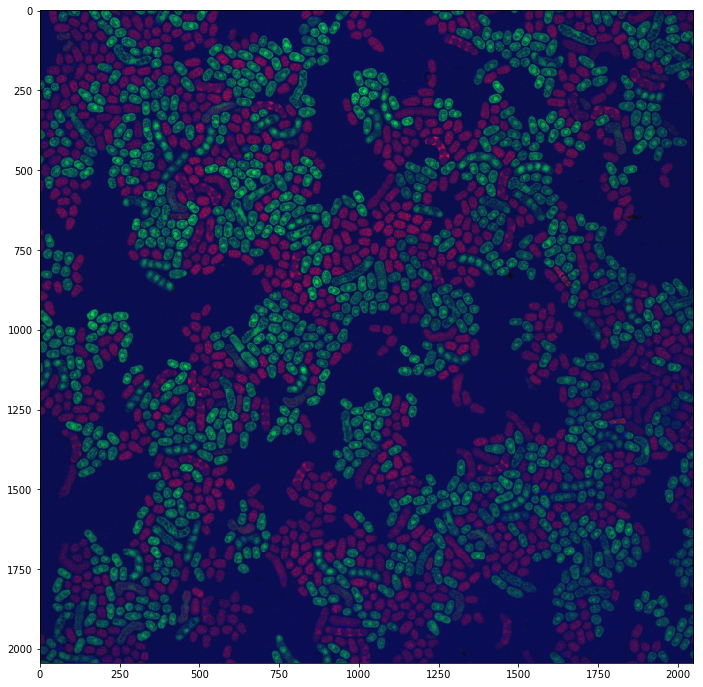

In [42]:
# data_raw = imread('/Users/cjw/Data/sez/RawTifs/10_hours_punched_overnight/NDExp_Point0017_Seq0017.tif')
data_raw = imread('/Users/cjw/Data/sez/RawTifs/16_hours_punched_overnight/NDExp_Point0008_Seq0008.tif')
dmin = data_raw.min(axis=(0,1),keepdims=True)
dmax = data_raw.max(axis=(0,1),keepdims=True)
data = (data_raw - dmin)/(dmax - dmin)

plt.figure(figsize=(12,12))
plt.imshow(data)
print(data_raw.shape, dmin.shape, dmax.shape)

In [35]:
def decode(patches):
    ds = sess.run(decoder, feed_dict={images:patches})
    return ds

        
def image_to_patches(image, w):
    
    ny, nx, nc = image.shape
    
    patch_list = list()
    xmax = 0
    ymax = 0
    xok = True
    yok = True
    while xok:
        yok = True
        ymax = 0
        xs = xmax
        xmax += w
        if xmax >= nx:
            xmax = nx
            xs = nx - w
            xok = False
        while yok:
            ys = ymax
            ymax += w
            if ymax > ny:
                ymax = ny
                ys = ny - w
                yok = False
            #print(ys, ymax, yok, xs, xmax, xok)
            p = np.expand_dims(image[ys:ymax, xs:xmax, :], 0)
            patch_list.append(p)
    
    patches = np.concatenate(patch_list, axis=0)
    print(patches.shape)
    return  patches

def patches_to_image(patches, w, nx, ny):
    
    image = np.zeros((ny, nx, patches.shape[-1]), dtype=patches.dtype)
    xmax = 0
    ymax = 0
    xok = True
    yok = True
    patch_index = 0
    while xok:
        ymax = 0
        yok = True
        xs = xmax
        xmax += w
        if xmax >= nx:
            xmax = nx
            xs = nx - w
            xok = False
        while yok:
            ys = ymax
            ymax += w
            if ymax > ny:
                ymax = ny
                ys = ny - w
                yok = False
            image[ys:ymax, xs:xmax, :] = patches[patch_index]
            patch_index += 1
            #print(patch_index, ys, ymax, xs, xmax, yok, xok)
    return image

In [43]:
import time

t1 = time.time()
p = image_to_patches(data, 256)
d2 = data[128:, 128:, :]
p2 = image_to_patches(d2, 256)
dp = decode(p)
dp2 = decode(p2)
ndp = dp.shape[0]

r1 = patches_to_image(dp, 256, data.shape[1] , data.shape[0])
r2 = patches_to_image(dp2, 256, data.shape[1] - 128, data.shape[0] - 128)

rr2 = r1*0
rr2[128:, 128:, :] = r2

rstack = np.stack((r1, rr2), axis=0)

r = rstack.max(axis=0)

print(time.time()  - t1)


(64, 256, 256, 3)
(64, 256, 256, 3)
5.7254979610443115


(2044, 2048, 5)


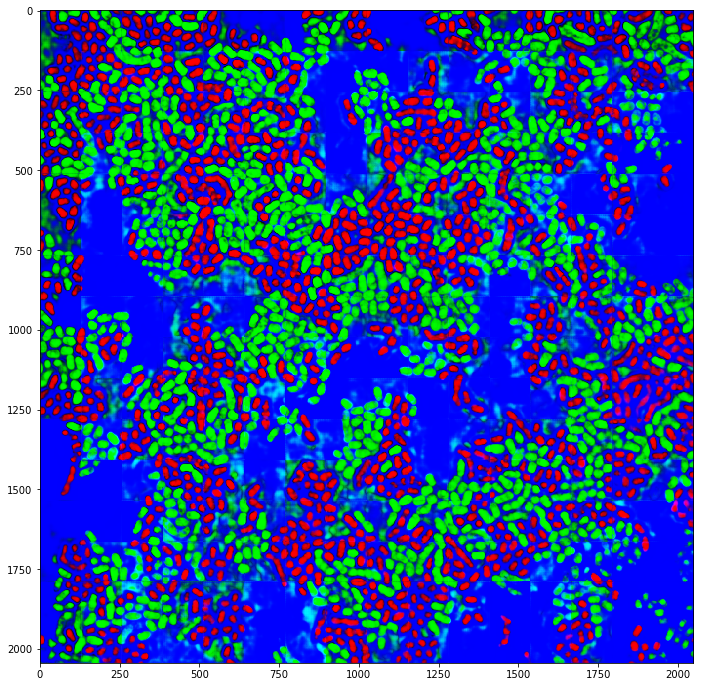

In [57]:
tr = r# > .8
#tr = tr.astype(np.int32)
#tr = 255*tr
print(tr.shape)
plt.figure(figsize=(12, 12))
plt.imshow(tr[:,:,0:3])



In [18]:
import tifffile
tifffile.imsave('/Users/cjw/Projects/sez/unetout0022.tif', np.moveaxis(r, -1, 0))